In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style("whitegrid")
pio.renderers.default = 'svg'
%matplotlib inline

In [3]:
!pip install -U kaleido
!pip install --upgrade plotly

In [4]:
!sudo apt update
!sudo apt-get install -y libnss3 libatk-bridge2.0-0 libcups2 libxcomposite libxdamage1 libxfixes3 libcrandr2 libgbm1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,640 kB]
Get:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [70.9 kB]
Get:14 

In [5]:
!plotly_get_chrome


Plotly will install a copy of Google Chrome to be used for generating static images of plots.
Chrome will be installed at: None
Do you want to proceed? [y/n] y
Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: /usr/local/lib/python3.12/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


In [8]:
!pip install xlrd

In [38]:
df1 = pd.read_csv('/content/hotel_bookings 2.xls')

In [39]:
df = df1.copy()

In [40]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [41]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [43]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'],dayfirst=True)

In [44]:
df1['reservation_status_date']

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03
...,...
119385,2017-09-06
119386,2017-09-07
119387,2017-09-07
119388,2017-09-07


In [45]:
df1.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [46]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [47]:
for col in df1.describe(include="object"):
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [48]:
df1.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [49]:
df1.drop(['company','agent'], axis = 1 , inplace = True)

In [50]:
df1.dropna(inplace = True)

In [52]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

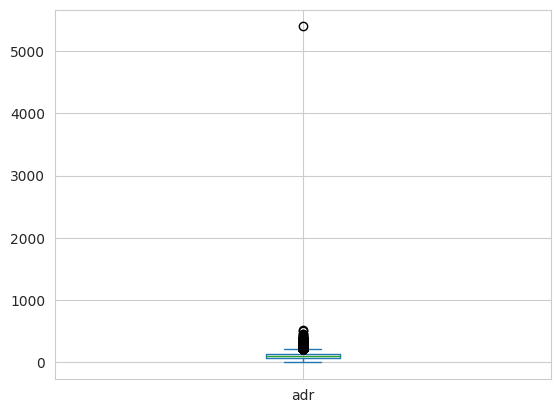

In [53]:
df1['adr'].plot(kind = 'box')

The graph shows that cancelled bookings generally have a higher average daily rate (ADR) compared to non-cancelled bookings, with a clear trend of ADR fluctuations over the months from January 2016 to September 2017.

In [54]:
df1 = df1[df1['adr']<5000]

<Axes: >

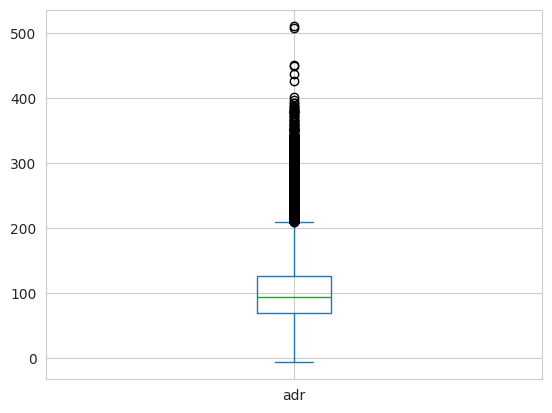

In [55]:
df1['adr'].plot(kind = 'box')

In [56]:
cancelled_percentage = df1['is_canceled'].value_counts(normalize = True)
cancelled_percentage

,proportion
is_canceled,
0,0.628653
1,0.371347


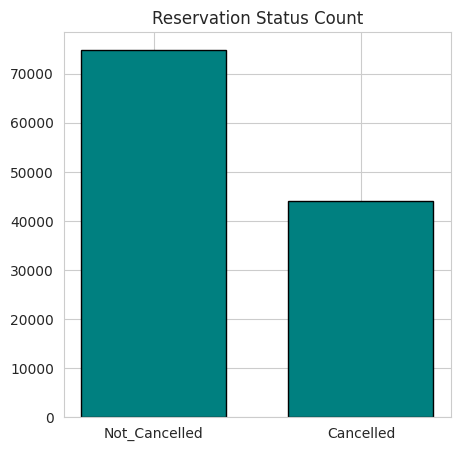

In [57]:
plt.figure(figsize=(5,5))
plt.title('Reservation Status Count')
plt.bar(['Not_Cancelled', 'Cancelled'],df1['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7, color = 'teal')
plt.show()

The 'Reservation Status Count' graph  shows that approximately 62.87% of the bookings were not cancelled, while about 37.13% were cancelled

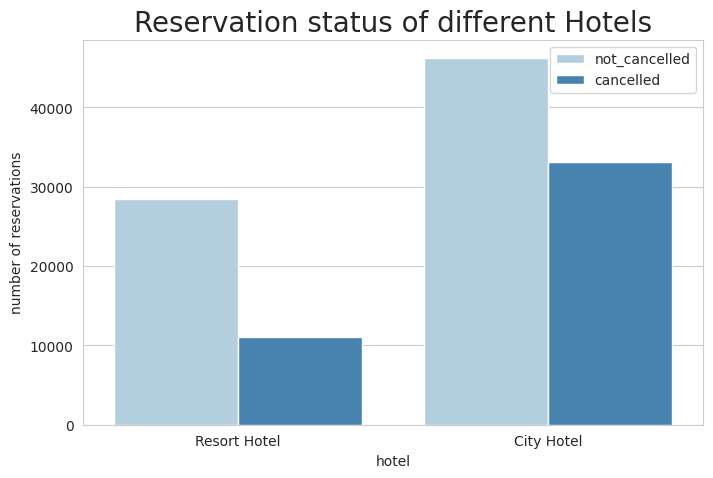

In [58]:
plt.figure(figsize = (8,5))
ax1 = sns.countplot(x ='hotel', hue = 'is_canceled', data = df1, palette = 'Blues')
legend_labels_ = ax1. get_legend_handles_labels()
plt.title('Reservation status of different Hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not_cancelled', 'cancelled'])
plt.show()

This graph indicates that City Hotels have a higher number of both cancelled and not cancelled reservations compared to Resort Hotels. It also shows a higher proportion of cancellations for City Hotels than for Resort Hotels.

In [59]:
Resort_Hotel = df1[df1['hotel']=='Resort Hotel']
Resort_Hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
0,0.72025
1,0.27975


In [60]:
City_Hotel = df1[df1['hotel'] == 'City Hotel']
City_Hotel['is_canceled'].value_counts(normalize = True)

,proportion
is_canceled,
0,0.582918
1,0.417082


In [61]:
Resort_Hotel = Resort_Hotel.groupby('reservation_status_date')[['adr']].mean()
City_Hotel = City_Hotel.groupby('reservation_status_date')[['adr']].mean()

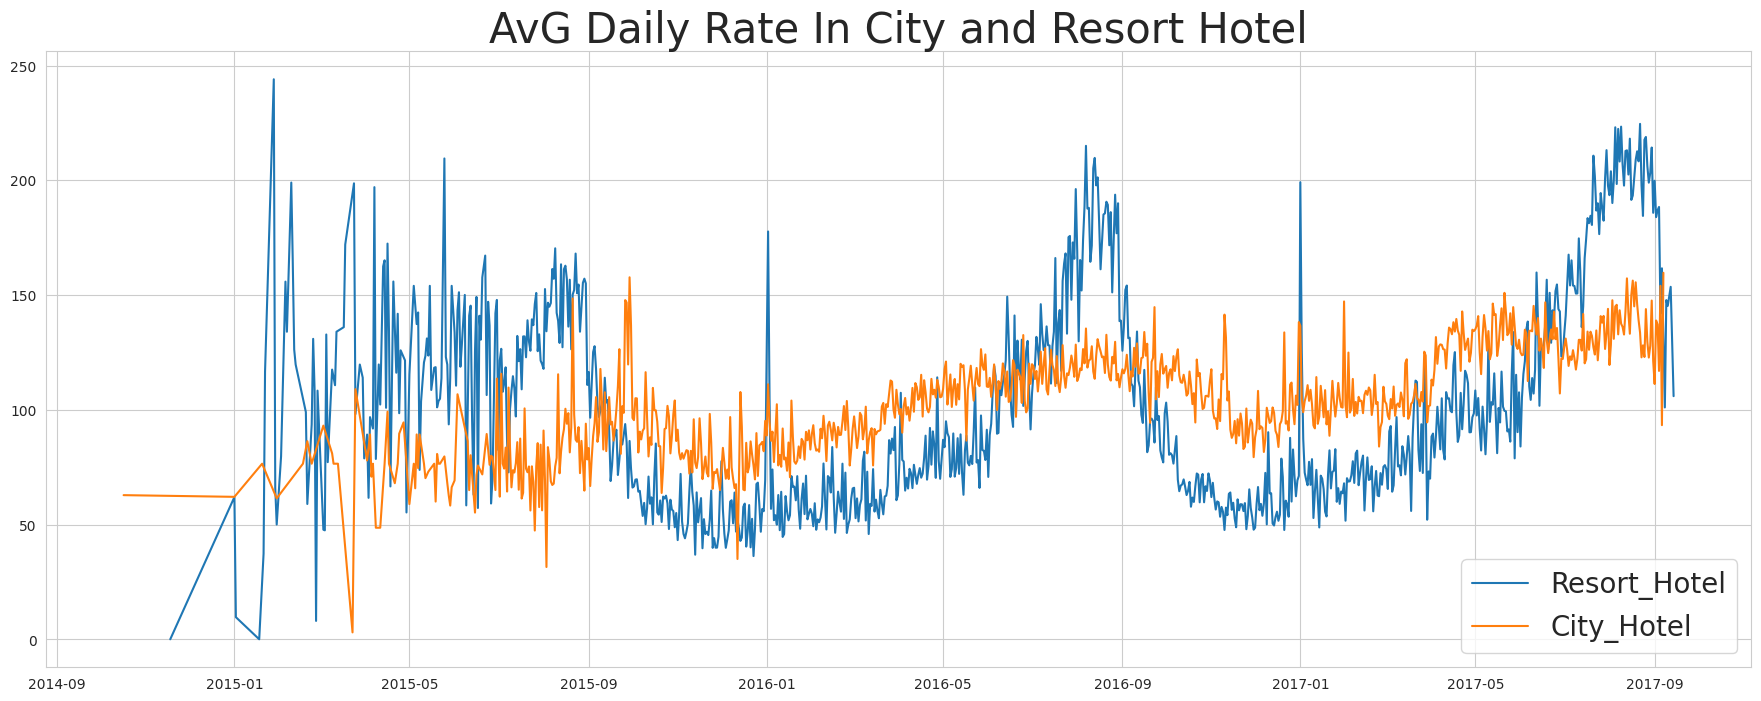

In [63]:
plt.figure(figsize = (22,8))
plt.title('AvG Daily Rate In City and Resort Hotel', fontsize = 30)
plt.plot(Resort_Hotel.index, Resort_Hotel['adr'], label = 'Resort_Hotel')
plt.plot(City_Hotel.index, City_Hotel['adr'], label = 'City_Hotel')
plt.legend(fontsize = 20 )
plt.show()

This graph illustrates the fluctuation of average daily rates for both City and Resort Hotels over time, allowing for a comparison of their pricing trends.

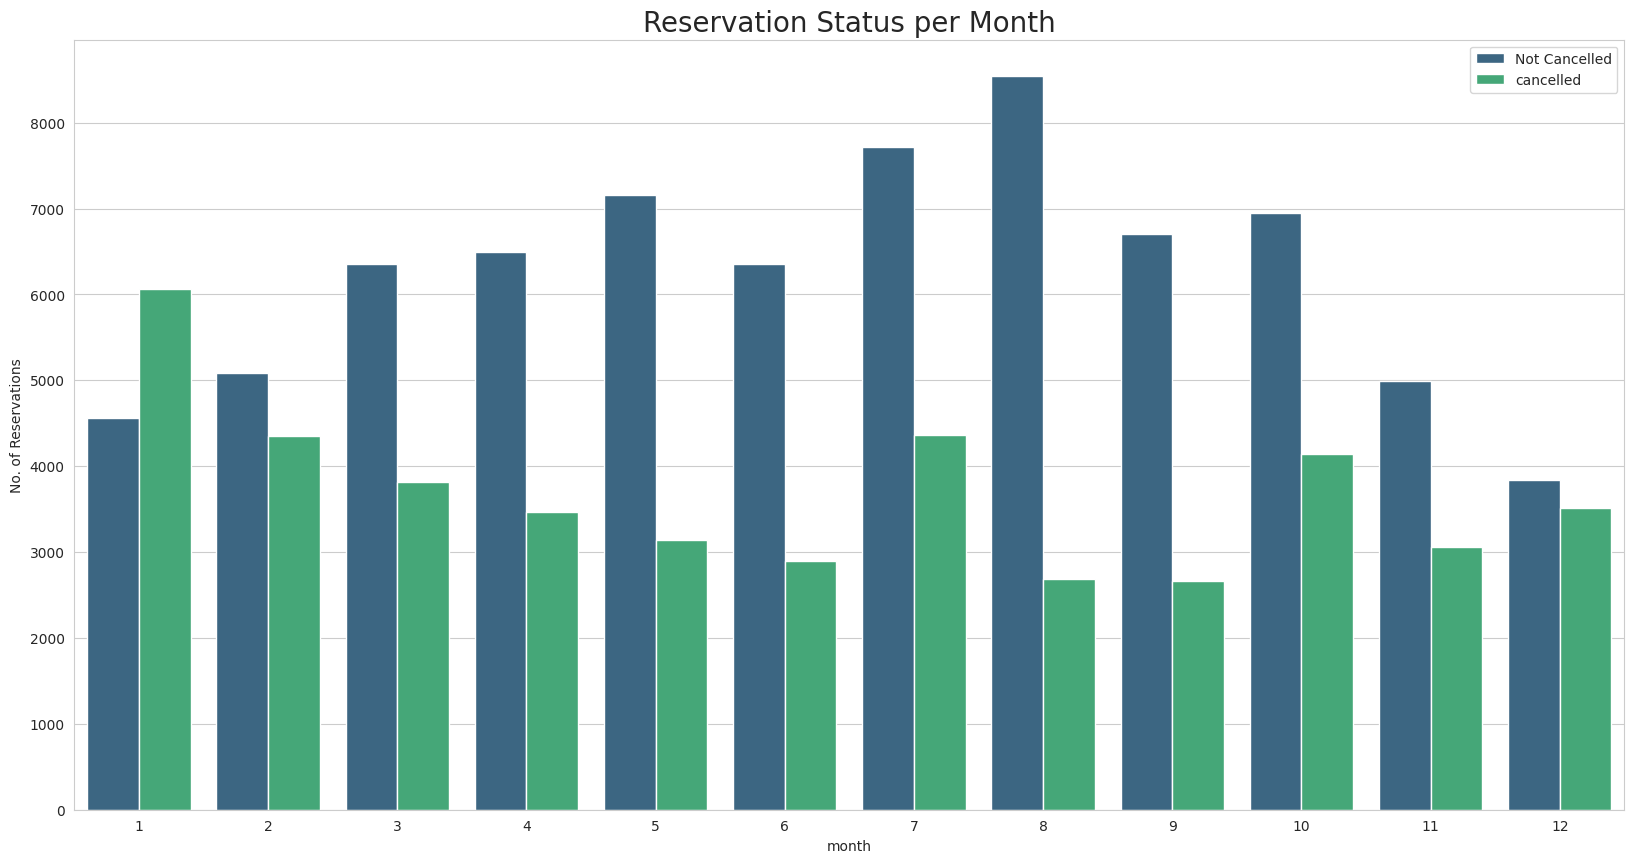

In [64]:
df1['month'] = df1['reservation_status_date'].dt.month
plt.figure(figsize = (20,10))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled' , data = df1, palette = 'viridis')
legend_labels_ = ax1. get_legend_handles_labels()
plt.title('Reservation Status per Month', size = 20)
plt.xlabel('month')
plt.ylabel('No. of Reservations')
plt.legend(['Not Cancelled', 'cancelled'])
plt.show()

This illustrates the number of cancelled and non-cancelled reservations for each month, showing fluctuations in booking and cancellation volumes throughout the year

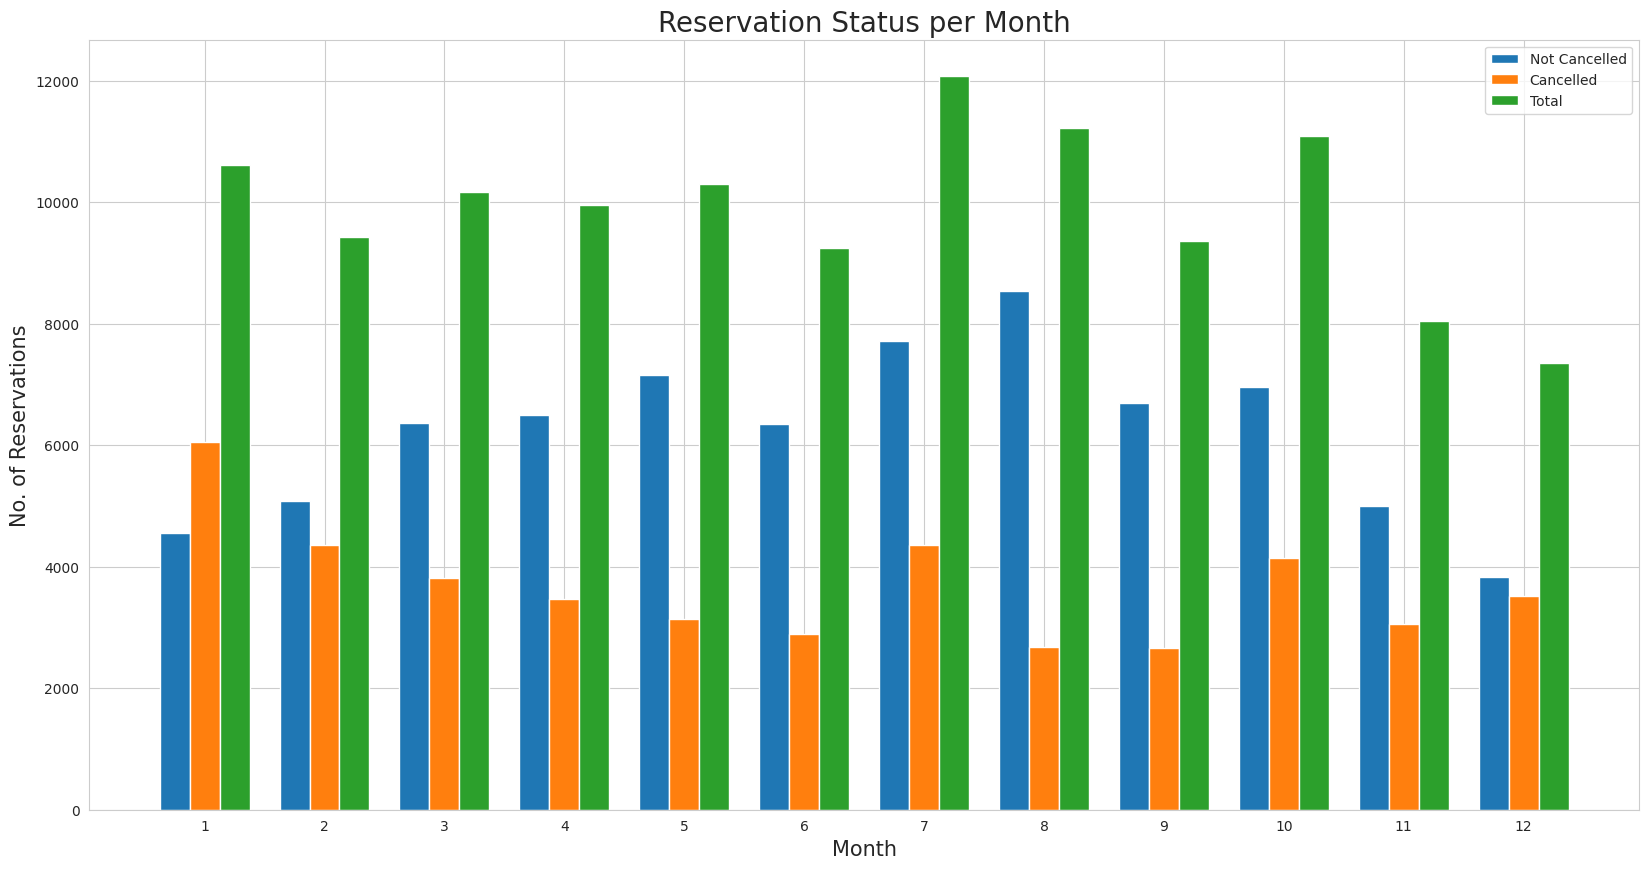

In [66]:
monthly_data = df1.groupby('month')['is_canceled'].value_counts().unstack().fillna(0)

if 0 not in monthly_data.columns:
    monthly_data[0] = 0
if 1 not in monthly_data.columns:
    monthly_data[1] = 0
monthly_data = monthly_data.sort_index()
monthly_data['total'] = monthly_data[0] + monthly_data[1]
x = np.arange(len(monthly_data.index))
width = 0.25
plt.figure(figsize=(20,10))
plt.bar(x - width, monthly_data[0], width=width, label='Not Cancelled')
plt.bar(x, monthly_data[1], width=width, label='Cancelled')
plt.bar(x + width, monthly_data['total'], width=width, label='Total')

plt.xticks(x, monthly_data.index)
plt.title('Reservation Status per Month', size=20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('No. of Reservations', fontsize = 15)
plt.legend()

plt.show()

From the 'Reservation Status per Month' graph in cell 66, we can conclude that the number of reservations and cancellations fluctuates significantly throughout the year. Notably, months like January and July tend to have a higher number of cancellations, while August and September show comparatively lower cancellation figures, suggesting seasonal patterns in booking behavior and cancellation rates.

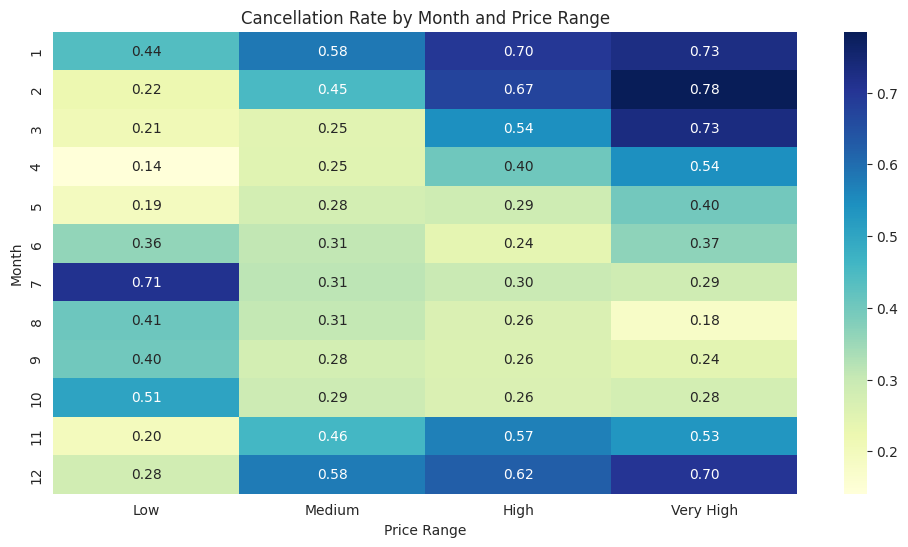

In [67]:
df1['price_range'] = pd.qcut(df1['adr'], 4, labels=['Low','Medium','High','Very High'])

heat_data = df1.groupby(['month','price_range'])['is_canceled'].mean().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(heat_data, annot=True, fmt=".2f", cmap="YlGnBu")

plt.title('Cancellation Rate by Month and Price Range')
plt.ylabel('Month')
plt.xlabel('Price Range')
plt.show()


we can conclude that cancellation rates vary significantly depending on both the month and the price range. Generally, bookings in higher price ranges tend to have higher cancellation rates, especially during certain months like January and February.

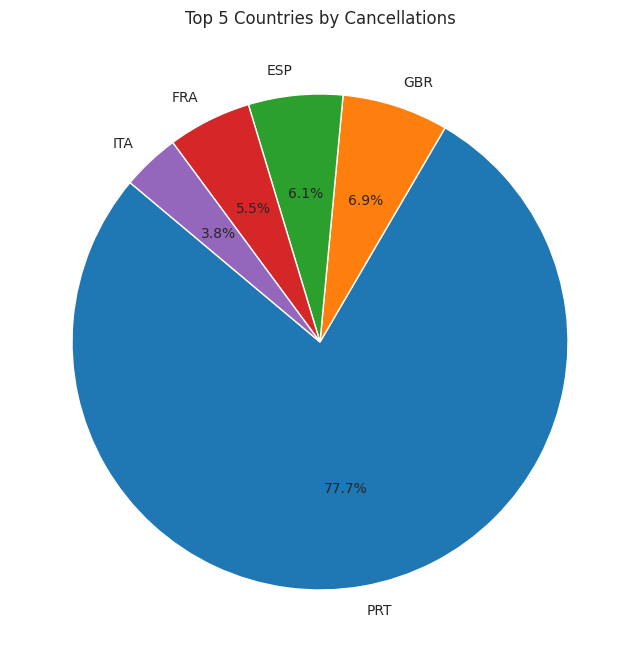

In [76]:
cancelled_df = df1[df1['is_canceled'] == 1]
country_cancel = cancelled_df['country'].value_counts().head(5)

plt.figure(figsize=(8,10))
plt.pie(country_cancel,
        labels=country_cancel.index,
        autopct='%1.1f%%',
        startangle=140)

plt.title('Top 5 Countries by Cancellations')
plt.show()

it is evident that Portugal (PRT) accounts for the largest proportion of cancellations, significantly outweighing cancellations from other countries like Great Britain (GBR), Spain (ESP), France (FRA), and Italy (ITA).

In [69]:
df1['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.474377
Offline TA/TO,0.203193
Groups,0.166581
Direct,0.104696
Corporate,0.042987
Complementary,0.006173
Aviation,0.001993


In [70]:
not_cancelled_data = df1[df1['is_canceled']==0]
cancelled_data = df1[df1['is_canceled']==1]
cancelled_data['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.469696
Groups,0.273985
Offline TA/TO,0.187466
Direct,0.043486
Corporate,0.022151
Complementary,0.002038
Aviation,0.001178


In [71]:
filtered_df = df1[
    (df1['reservation_status_date'] >= '2016-01-01') &
    (df1['reservation_status_date'] <= '2017-09-30')
].copy()

In [72]:
filtered_df['year_month'] = filtered_df['reservation_status_date'].dt.to_period('M')

In [73]:
adr_not_cancelled = (
    filtered_df[filtered_df['is_canceled'] == 0]
    .groupby('year_month')['adr']
    .mean()
)

adr_cancelled = (
    filtered_df[filtered_df['is_canceled'] == 1]
    .groupby('year_month')['adr']
    .mean()
)

In [74]:
adr_not_cancelled.index = adr_not_cancelled.index.to_timestamp()
adr_cancelled.index = adr_cancelled.index.to_timestamp()

combined = pd.concat([adr_not_cancelled, adr_cancelled], axis=1)
combined.columns = ['Not Cancelled', 'Cancelled']
combined = combined.sort_index()

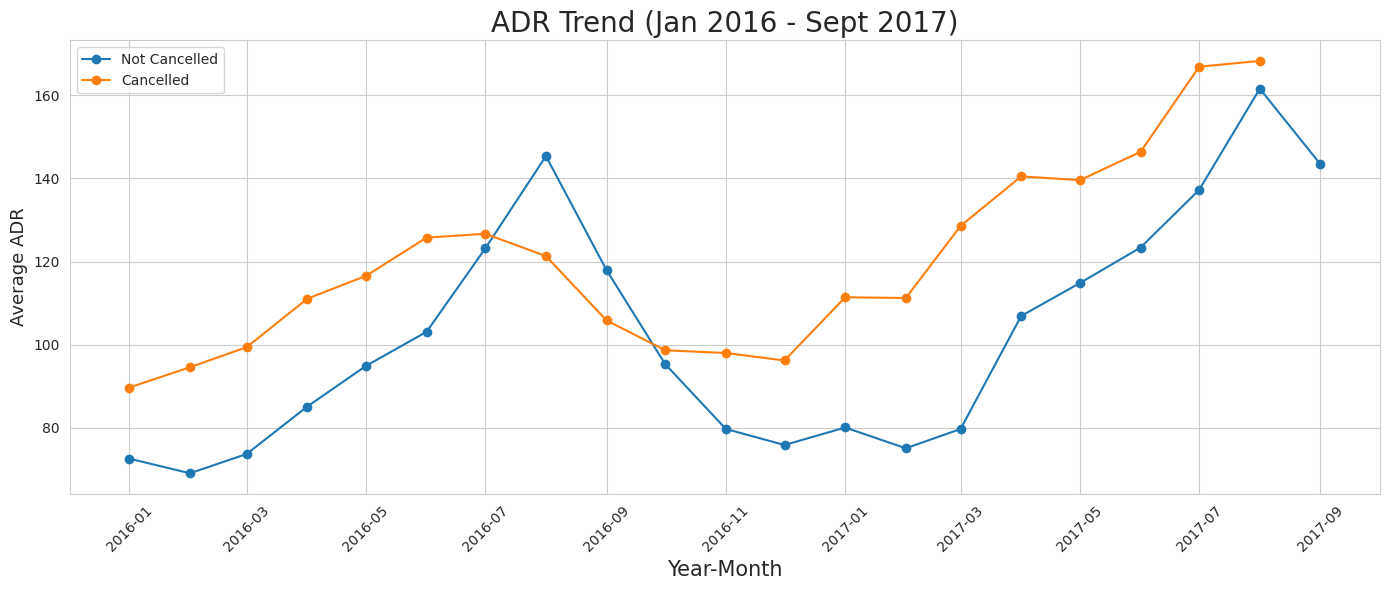

In [75]:
plt.figure(figsize=(14,6))

plt.plot(combined.index, combined['Not Cancelled'], marker='o', label='Not Cancelled')
plt.plot(combined.index, combined['Cancelled'], marker='o', label='Cancelled')

plt.xlabel('Year-Month', fontsize = 15)
plt.ylabel('Average ADR', fontsize = 13)
plt.title('ADR Trend (Jan 2016 - Sept 2017)', fontsize = 20)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 it is evident that cancelled bookings generally have a higher average daily rate (ADR) compared to non-cancelled bookings, with both exhibiting clear fluctuations over the months from January 2016 to September 2017.

##***Conclusion***

The analysis reveals that hotel booking cancellations are a significant challenge, particularly for City Hotels and during specific times of the year. Higher-priced bookings are also more susceptible to cancellation. By understanding these patterns, hotels can implement data-driven strategies focusing on dynamic pricing, targeted marketing, improved customer engagement, and optimized cancellation policies across different hotel types, seasons, and market segments. These efforts should aim to reduce cancellation rates, convert potential cancellations into confirmed stays, and ultimately boost overall revenue.

#***Suggestions***

Hotels can significantly mitigate revenue loss by implementing data-driven strategies that combine dynamic pricing, targeted communication, and flexible cancellation policies tailored to hotel type, seasonal trends, geographic origin, and market segment.
Focus on addressing the high cancellation rates in City Hotels, during peak cancellation months like January and July, and from the Portuguese market, through specific policy adjustments and promotional campaigns to convert potential cancellations into confirmed revenue.